>[Parte 1](#scrollTo=8q4c8oS-hpaE&uniqifier=1)

>>[programarlo de forma modular](#scrollTo=EEAeEGW_cYDi&uniqifier=1)

>[Parte 2](#scrollTo=WV6dMBzK_odZ&uniqifier=1)

>>[trabajo de clase](#scrollTo=UzI1wgTxcv6B&uniqifier=1)




#Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.04

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 henrios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores (de tiempo del archivo) ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





In [ ]:
#@title Librerías

import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

In [ ]:
#@title datos

df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo')
df

,Unnamed: 0,Corriente,tiempo
0,0,0.000000,0.00000
1,1,0.014533,0.10101
2,2,0.028854,0.20202
3,3,0.042967,0.30303
4,4,0.056875,0.40404
...,...,...,...
95,95,0.751104,9.59596
96,96,0.754721,9.69697
97,97,0.758285,9.79798
98,98,0.761798,9.89899


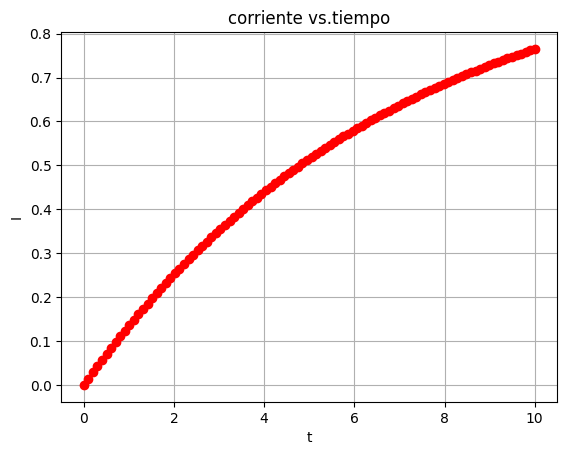

In [ ]:
#@title Grafico corriente vs.tiempo

plt.plot(df.tiempo, df.Corriente, 'ro')
plt.xlabel('t')
plt.ylabel('I')
plt.title('corriente vs.tiempo')
plt.grid();

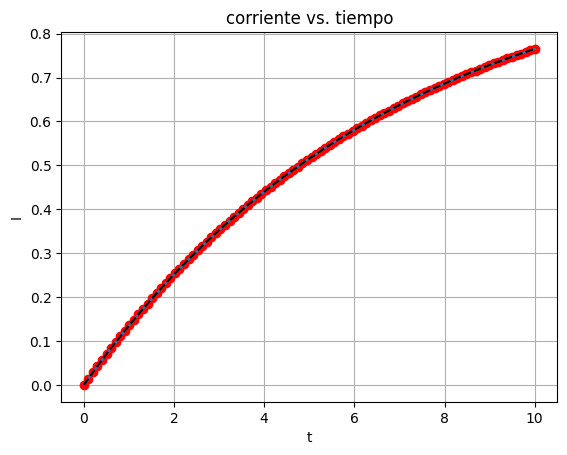

In [ ]:
#ahora, la idea es calcular la derivada numerica

#realizamos primero una interpolacion de los puntos por medio de cubic splines

pol = interpolate.CubicSpline(df.tiempo, df.Corriente)

tiempos = np.linspace(min(df.tiempo), max(df.tiempo), 100)
corrientes = np.linspace(min(df.Corriente), max(df.Corriente), 100)

plt.plot(df.tiempo, df.Corriente, 'ro')
plt.plot(df.tiempo, df.Corriente)
plt.plot(tiempos, pol(tiempos), 'k--')
plt.xlabel('t')
plt.ylabel('I')
plt.title('corriente vs. tiempo')
plt.grid();

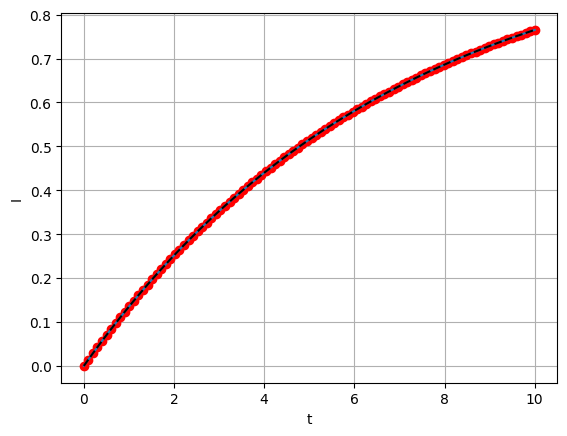

In [ ]:
#veamos ahora como queda con la interpolacion de hermite (si es mas precisa que la de splines cubicos)

pol_lagrange = interpolate.CubicSpline(df.tiempo, df.Corriente)

tiempos = np.linspace(min(df.tiempo), max(df.tiempo), 100)
corrientes = np.linspace(min(df.Corriente), max(df.Corriente), 100)

plt.plot(df.tiempo, df.Corriente, 'ro')
plt.plot(df.tiempo, df.Corriente)
plt.plot(tiempos, pol_lagrange(tiempos), 'k--')
plt.xlabel('t')
plt.ylabel('I')
plt.grid();

utilizaremos la interpolacion de los cubic splines

In [ ]:
#@title encontramos la derivada numerica, con ayuda de la función de interpolacion que encontramos
derivadas = derivative(pol, df.tiempo, 1e-6)
derivadas

<ipython-input-6-06a18e6ac71f>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = derivative(pol, df.tiempo, 1e-6)


array([0.14492746, 0.1428214 , 0.14074582, 0.13870043, 0.13668476,
       0.13469839, 0.13274089, 0.13081183, 0.1289108 , 0.1270374 ,
       0.12519123, 0.12337189, 0.12157898, 0.11981214, 0.11807096,
       0.1163551 , 0.11466416, 0.11299781, 0.11135566, 0.10973739,
       0.10814263, 0.10657104, 0.1050223 , 0.10349606, 0.101992  ,
       0.1005098 , 0.09904914, 0.09760971, 0.09619119, 0.09479329,
       0.09341571, 0.09205814, 0.09072031, 0.08940191, 0.08810268,
       0.08682233, 0.08556058, 0.08431717, 0.08309183, 0.08188429,
       0.08069431, 0.07952162, 0.07836597, 0.07722712, 0.07610481,
       0.07499882, 0.0739089 , 0.07283481, 0.07177634, 0.07073325,
       0.06970532, 0.06869232, 0.06769405, 0.06671029, 0.06574082,
       0.06478544, 0.06384394, 0.06291613, 0.0620018 , 0.06110076,
       0.06021281, 0.05933777, 0.05847544, 0.05762565, 0.0567882 ,
       0.05596293, 0.05514964, 0.05434818, 0.05355837, 0.05278003,
       0.052013  , 0.05125712, 0.05051223, 0.04977816, 0.04905

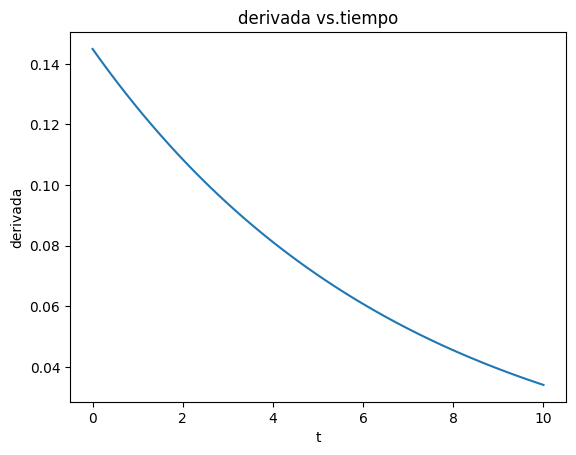

In [ ]:
#@title gráfico de la derivada con respecto al tiempo

plt.plot(df.tiempo, derivadas)
plt.xlabel('t')
plt.ylabel('derivada')
plt.title('derivada vs.tiempo');

Aproxime el votaje  $\varepsilon(t)$ en los valores de tiempo dados

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

In [ ]:
#@title función y valores dados

L = 0.98
r = 0.142

voltaje = lambda di, i: L * di + r * i

In [ ]:
df['voltaje'] = voltaje(derivadas, df.Corriente)
df

,Unnamed: 0,Corriente,tiempo,voltaje
0,0,0.000000,0.00000,0.142029
1,1,0.014533,0.10101,0.142029
2,2,0.028854,0.20202,0.142028
3,3,0.042967,0.30303,0.142028
4,4,0.056875,0.40404,0.142027
...,...,...,...,...
95,95,0.751104,9.59596,0.142007
96,96,0.754721,9.69697,0.142007
97,97,0.758285,9.79798,0.142007
98,98,0.761798,9.89899,0.142007


##programarlo de forma modular

<ipython-input-10-d3a3ff53b08c>:27: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = derivative(pol, df.tiempo, 1e-6)
<ipython-input-10-d3a3ff53b08c>:27: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivadas = derivative(pol, df.tiempo, 1e-6)


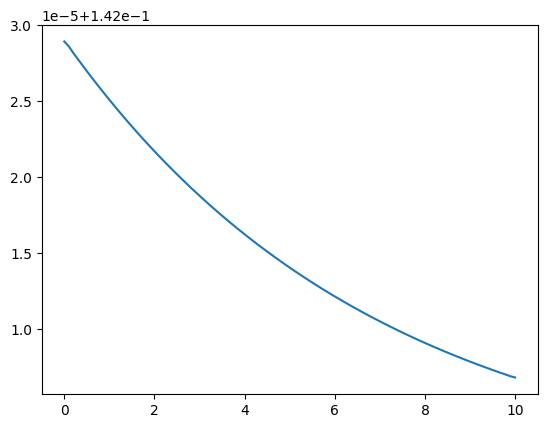

In [ ]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

def read_file(path, select):
  '''ingrese la url o el path donde se encuentra publicado el archivo el forma csv como un str'''
  if (select == 'csv'):
    try:
      df = pd.read_csv(path)
    except:
      print('el archivo no fué leido correctamente')
  elif (select == 'xlsx'):
    df = pd.read_excel(path)
  else:
    print('el archivo debe tener extensión csv o xlsx')
    df = None
    exit(1)                                               #para salir del programa si no se satisfacen las condiciones iniciales que se establecen

  return df

def derivada(df, L, r):
  '''las columnas de df son tiempo y Corriente. Ingresar el valor de la impedancia y de la resistencia del circuito'''

  pol = interpolate.CubicSpline(df.tiempo, df.Corriente)
  derivadas = derivative(pol, df.tiempo, 1e-6)
  voltaje = lambda di, i: L * di + r * i
  df['voltaje'] = voltaje(derivadas, df.Corriente)

  return df

def output(df):
  '''igresa el dataframe como va hasta el momento'''
  csv  = pd.DataFrame.to_csv(df)

  x = df.tiempo
  y = df.voltaje
  plt.plot(x, y)
  imagen = plt.savefig('voltajeVs.tiempo.png')

  return 'Done'


if __name__ == "__main__":
  path = 'https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo'
  select = 'csv'               #ingresar los valores de path y de select
  L = 0.98
  r = 0.142
  read_file(path, select)
  derivada(read_file(path, select), L, r)             #ingreso el df
  output(derivada(read_file(path, select), L, r))     #el df que sale de la derivada

# Parte 2

**1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.**

Para el cálculo de la integral con la regla del trapecio simple, se hace uso del polinomio de interpolación de lagrange, el cual es de la forma:

\begin{equation}
  p(x) = \sum_{i = 0}^{n}y_iL_i(x)
\end{equation}

, donde:

\begin{equation}
  L_i(x) = \prod_{j = 0, j \neq i}^{n}\frac{x-x_j}{x_i-x_j}
\end{equation}

Ahora, para la aproximación de la integral de la función en el intervalo $[a,b]$, se puede usar el polinomio de lagrange que interpola los puntos $(a, f(a))$ y $(b, f(b))$, el cual se puede escribir como:

\begin{equation}
  p(x) = f(a)L_0(x) + f(b)L_1(x)
\end{equation}

donde

\begin{equation}
  L_0(x) = \frac{x-b}{a-b}
\end{equation}

y

\begin{equation}
  L_1(x) = \frac{x-a}{b-a}
\end{equation}

Por lo tanto, la aproximación de la integral por el polinomio de Lagrange es:

\begin{equation}
  \int_{a}^{b}p(x)dx = \int_{a}^{b}[f(a)L_0(x) + f(b)L_1(x)]dx
\end{equation}

lo cual, conduce a que:

\begin{equation}
  \int_{a}^{b}p(x)dx = \frac{b-a}{2}[f(a)+f(b)] - \frac{(b-a)^3}{12}f''(\xi)
\end{equation}

Ahora bien, la regla del trapecio compuesta es una forma de aproxima una integral definida utilizando n trapecios.

La fórmula es:

\begin{equation}
  \int_{a}^{b}f(x)dx \approx \frac{h}{2}[f(a) + 2 \sum_{i=1}^{n-1}f(x_i) + f(b)]
\end{equation}

donde $\frac{b-a}{n}$ es el ancho de cada subintervalo y $x_i = a+ ih$ son los puntos en los cuales se evalúa la función.

Además el error en esta aproximación está por:

\begin{equation}
  E = -\frac{(b-a)^3}{12n^2}f''(\xi)
\end{equation}

donde $\xi$ es un numero entre $a$ y $b$.

**2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson**

Se basa en aproximar la función por polinomios de segundo grado en cada subintervalo, de tal manera que la expresión e sla siguiente:

\begin{equation}
  \int_{a}^{b} f(x)dx \approx \frac{h}{3}[f(a) + 4f(x_1) + 2f(x_2) +4f(x_3)+ ...+ 2f(x_{n-2}) + 4f(x_{n-1}) + f(b)]
\end{equation}

donde $h = \frac{b-a}{n}$ es el ancho de cada subintervalo y $x_i = a+ih$ son los puntos en los cuales se evalúa la función.

El error de este método es:

\begin{equation}
  E = -\frac{(b-a)^5}{180n^4}f^{(4)}(\xi)
\end{equation}

siendo $\xi$ un numero entre $a$ y $b$.

**3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.**

El método de cuadratura es un método numérico para el cálculo de integrales definidas. La fórmula de cuadratura más conocida es la regla del trapecio, que se basa en aproximar la función a integrar por un polinomio de primer grado y luego calcular el área del trapecio formado por la recta que une los extremos de la curva y el eje x.

Otra fórmula de cuadratura es la regla de Simpson, que se basa en aproximar la función a integrar por un polinomio de segundo grado y luego calcular el área del paraboloide formado por la curva y el eje x.

Existen muchas otras fórmulas de cuadratura, como la regla de los tres octavos, la regla de Boole y la regla de Gauss-Legendre.[1](https://mathworld.wolfram.com/Legendre-GaussQuadrature.html)

Algunas de las fórmulas son:

- Fórmula de Simpson 1/3 (cuando n=2):

\begin{equation}
  \int_{a}^{b}f(x)dx \approx \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2}) + f(b)]
\end{equation}

con su error:

\begin{equation}
  E = -\frac{(b-a)^5}{2880}f^{(4)}(\xi)
\end{equation}

- Regla de simpson 3/8 (cuando n=3):

\begin{equation}
  \int_{a}^{b}f(x)dx \approx \frac{b-a}{8}[f(a) + 3f(\frac{2a+b}{3}) + 3f(\frac{a+2b}{3}) + f(b)]
\end{equation}

con su error:

\begin{equation}
  E = -\frac{(b-a)^5}{6480}f^{(4)}(\xi)
\end{equation}

Entre otras fórmulas...


**4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales**

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  


RECORDAR que la fórmula para el error en la regla del trapecio (con n trapecios) es:

\begin{equation}
  E = -\frac{(b-a)^3}{12n^2}f''(\xi)
\end{equation}

In [ ]:
#@title Librerías

from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import optimize

In [ ]:
#@title Definición de las funciones a integrar

f1 = lambda x : 1 / np.sqrt(np.tan(x))
f2 = lambda x: 1 / (1 + x**2)
f3 = lambda x, y: 2 * y * np.sin(x) + (np.cos(x))**2

In [ ]:
#@title primera integral

N = 2765                                       #ingresamos el valor de n que posteriormente nos indica el problema que debemos elegir para garantizar la precision indicada
x = np.linspace(0, (np.pi / 2 ), N)[1:-1]
y = f1(x)

trap  = integrate.trapezoid(y, x)
simp = integrate.simpson(y, x)
quad = integrate.quad(f1, 0, np.pi / 2 )

print(f' el valor de la integral usando el método del trapecio es {trap}')
print(f' el valor de la integral usando el método de simpson es {simp}')
print(f' el valor de la integral usando el método de la cuadratura es {quad[0]}')

 el valor de la integral usando el método del trapecio es 2.1746986777262136
 el valor de la integral usando el método de simpson es 2.17386565388171
 el valor de la integral usando el método de la cuadratura es 2.2214414690792026


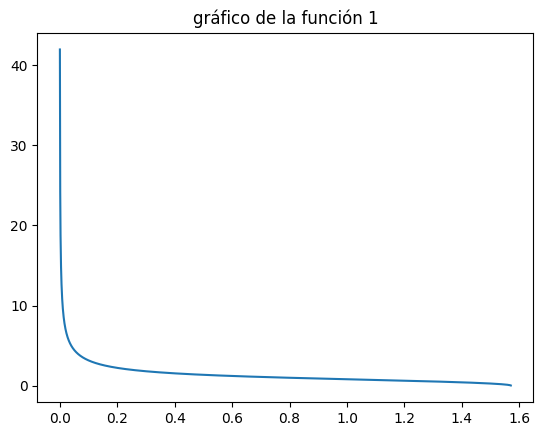

In [ ]:
plt.plot(x,y)
plt.title('gráfico de la función 1');

In [ ]:
#@title Aplicación de la fórmula del trapecio para el cálculo del Error

x = sp.symbols('x')

def f1_(x):
  return 1 / sp.sqrt(sp.tan(x))

der = sp.diff(f1_(x), x, 2)
der

(3*(tan(x)**2 + 1)/(4*tan(x)**2) - 1)*(tan(x)**2 + 1)/sqrt(tan(x))

In [ ]:
#convertimos a una funcion de numpy

derivada_2 = sp.lambdify(x, der, 'numpy')

(0.1, 236.76858122993417)

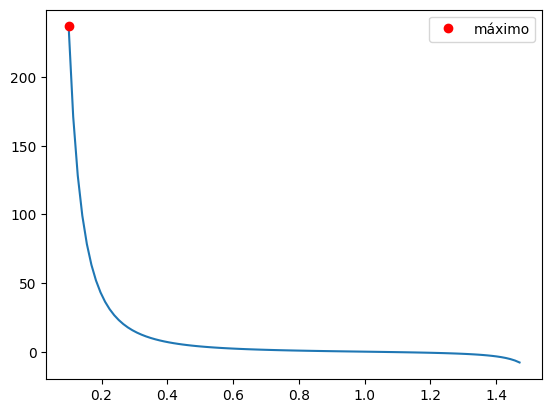

In [ ]:
#graficamos

x = np.linspace(0.1, np.pi/2-0.1, 100)
y = derivada_2(x)

plt.plot(x, y)
plt.plot(x[0], y[0], 'ro', label= 'máximo')
plt.legend();
x[0], y[0]

In [ ]:
#@title Con base al error, determinación del numero de trapecios que se ncesita tener en cuenta

a = 0
b = np.pi/2
E = 1E-5

n = np.sqrt((b-a)**3 / (12 * E) * y[0])
n

2765.3571459400027

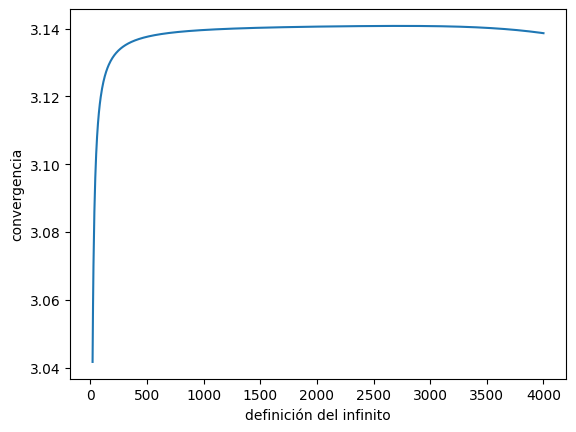

In [ ]:
#@title segunda integral

#miramos como es el comportamiento de la funcion para determinar que valor escogemos como infinito

a = np.linspace(20,4000, 1000)

#ver para cada valor de 'a' a que converge la integral

area = []
for a_ in a:
  x = np.linspace(-a_, a_, 10000)
  area.append(integrate.trapz(f2(x), x))
  
plt.plot(a, np.array(area))
plt.xlabel('definición del infinito')
plt.ylabel('convergencia');

#notamos qu converge a pi

#tomamos el valor de 3000 como infinito, pues es el comportamiento estable de la integral

In [ ]:
#@title evaluacion de la integral con el numero que para ella representa el infinito

N = 10000 
lim = 3000
x = np.linspace(-lim, lim, N)
y = f2(x)

trap  = integrate.trapezoid(y, x)
simp = integrate.simpson(y, x)
quad = integrate.quad(f2, -lim, lim)

print(f' el valor de la integral usando el método del trapecio es {trap}')
print(f' el valor de la integral usando el método de simpson es {simp}')
print(f' el valor de la integral usando el método de la cuadratura es {quad[0]}')

 el valor de la integral usando el método del trapecio es 3.1407478716668424
 el valor de la integral usando el método de simpson es 3.140747871671289
 el valor de la integral usando el método de la cuadratura es 3.140925986947829


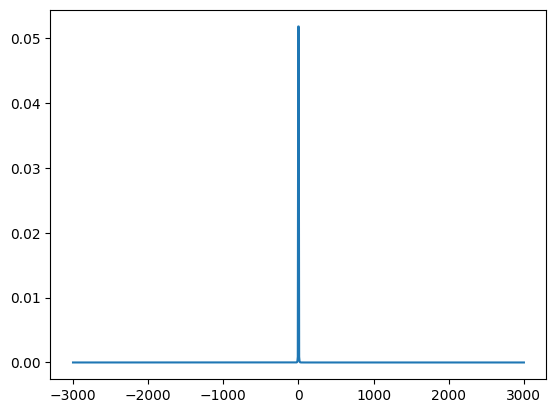

In [ ]:
#@title Aplicación de la fórmula del trapecio para el cálculo del error

a= -3000
b=  3000

#comenzamos por encontrar el máximo de la segunda derivada de la funcion 2

x= sp.symbols('x')

f2 = lambda x: 1 / (1 + x**2)

der = sp.diff(f2(x), x, 2)
derivada = sp.lambdify(x, der, 'numpy')
der_nega = sp.lambdify(x, -der, 'numpy')

x= np.linspace(-3000, 3000, 1000)             #gráfico de la derivada
y = derivada(x)

plt.plot(x, y);

In [ ]:
max = optimize.fmin_powell(der_nega, 0.1, ftol = 1e-5)    #el minimo de la funcion negativa será el máximo de la positiva

max= 0.99999999         #de acuerdo con lo que contiene max
valor_maxx = derivada(max)

#veamos con el error cuál es el numero de n que necesito

a = -3000
b = 3000
E = 1e-5

n = np.sqrt((b-a)**3 / (12 * E) * valor_maxx)
print(f'el numero de trapecios que necesitamos es {n}')


#observamos que el numero que nos está regresando es un valor muy grande y que al evaluarlo en realidad no estamos obteniendo el resultado deseado que es pi

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 2
         Function evaluations: 33
el numero de trapecios que ncesitamos es 29999999.99999999


In [ ]:
#@title tercera integral
f3 = lambda y, x: 2 * y * np.sin(x) + (np.cos(x))**2

#comnzamos por establecer el dominio de la variable x, que es de cero a pi cuartos
x = np.linspace(0, np.pi/4, 1000)

@np.vectorize
def integracion_doble_quad(x):
  a = np.sin(x)
  b = np.cos(x)
  area = integrate.quad(f3, a, b, args=(x))[0]
  return area

In [ ]:
integracion_doble_quad(x).sum()

651.5489906288813

In [ ]:
#@title antes de vectorizar, vamos a realizar la integración por medio de un ciclo for

N =1000
x = np.linspace(0, np.pi/4, N)
areas = np.zeros(N)


for i, j in enumerate(x):
  a = np.sin(j)
  b = np.cos(j)
  areas[i] = integrate.quad(f3, a, b, args =(j))[0]

area = np.sum(areas)
print(f'el valor de la integral es por el método de la cuadratura es {area}')

el valor de la integral es por el método de la cuadratura es 651.5489906288813


In [ ]:
integrate.simpson(areas, x)

0.5118446352500744

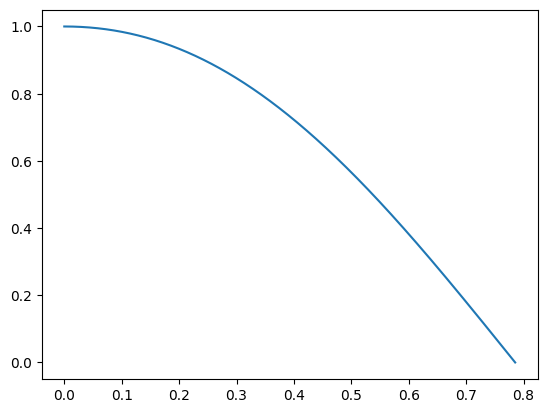

In [ ]:
plt.plot(x, areas);

El siguiente es el valor esperado de la integral de acuerdo con symbolab, lo cual corresponde a un valor de 0.5118446353109125

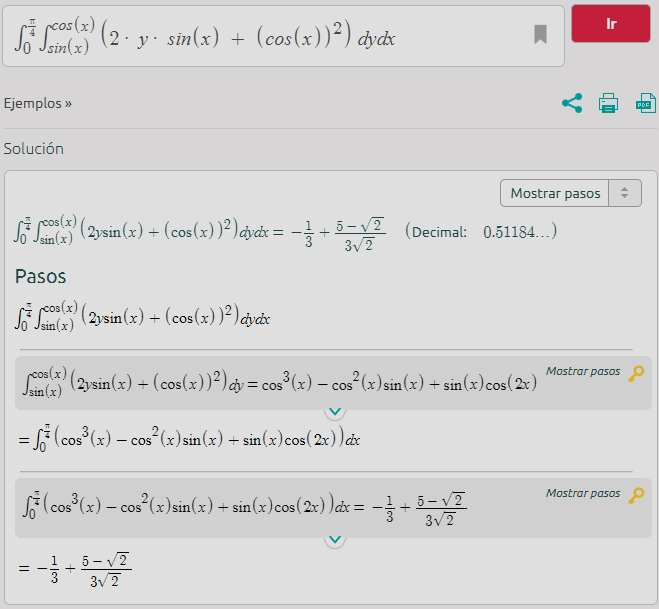

In [ ]:
#veamoslo ahora con el método del trapecio y de simpson, usando los datos que tenemos

trapz = integrate.trapz(areas, x)
simp = integrate.simpson(areas, x)

In [ ]:
print(f' el valor de la integral usando el método del trapecio es {trapz}')
print(f' el valor de la integral usando el método de simpson es {simp}')

 el valor de la integral usando el método del trapecio es 0.5118445260477336
 el valor de la integral usando el método de simpson es 0.5118446352500744


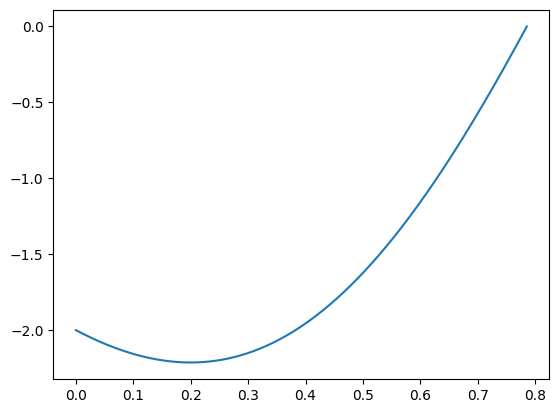

In [ ]:
#@title ajuste del N al error deseado

a= 0
b= np.pi/4

#comenzamos por encontrar el máximo de la segunda derivada de la funcion 2

x= sp.symbols('x')
y= sp.symbols('y')

f3_ = lambda x, y: 2 * y * sp.sin(x) + (sp.cos(x))**2

der = sp.diff(f3_(x, y), x, 2)
derivada = sp.lambdify((x,y), der, 'numpy')
der_nega = sp.lambdify((x,y), -der, 'numpy')

x= np.linspace(0, np.pi/4, 1000)
y = derivada(x, areas)

plt.plot(x, y);

In [ ]:
a = 0
b = np.pi/4
E = 1e-5

n = np.sqrt((b-a)**3 / (12 * E) * abs(derivada(x[-1], areas[-1])))
print(f'el numero de trapecios que necesitamos es {n}')


#######en este caso, tratándose de una integral doble, el resultado que se obtiene es un tanto extraño

el numero de trapecios que necesitamos es 1.6399285969204315e-06


##trabajo de clase


In [ ]:
from scipy import integrate

In [ ]:
N = 100
eps = 1E-4

#creamos un método de convergencia
#usamos un decorador que enuelve la otra funcion que tengo al frente

@np.vectorize  
def integral_trap(N, eps):
  x = np.linspace(0 + eps, np.pi/2 - eps, N)
  area= integrate.trapz(f1(x), x)
  return area

In [ ]:
ep = np.linspace(1e-6, 1e-3, 1000)
t = integral_trap(N, ep)

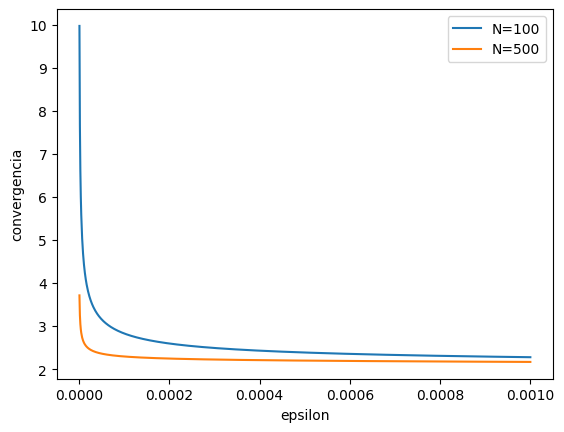

In [ ]:
#con base al grafico que realizamos, identificamos el valor del epsilon que debería considerarse y el numero de puntos

plt.plot(ep, integral_trap(100, ep), label = 'N=100')      #para un N miramos como es la convergencia de la integral
plt.plot(ep, integral_trap(500, ep), label = 'N=500') 
plt.xlabel('epsilon')
plt.ylabel('convergencia')
plt.legend(loc='best');

 el valor de la integral usando el método del trapecio es 0.2639520099030554
 el valor de la integral usando el método de simpson es 0.26394359339478457
 el valor de la integral usando el método de la cuadratura es 0.7853981633974484


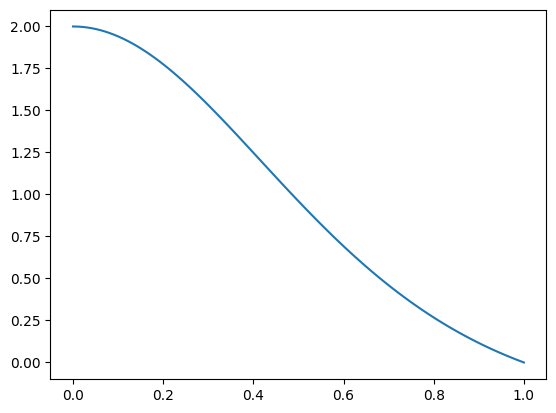

In [ ]:
#@title cálculo del error

def fun(x):
  return np.log(1+ x**2)

N = 100
x = np.linspace(0, 1, N)
y = fun(x)

trap  = integrate.trapezoid(y, x)
simp = integrate.simpson(y, x)
quad = integrate.quad(f2, 0, 1)

print(f' el valor de la integral usando el método del trapecio es {trap}')
print(f' el valor de la integral usando el método de simpson es {simp}')
print(f' el valor de la integral usando el método de la cuadratura es {quad[0]}')

x_= sp.Symbol('x_')

def fun_(x_):
  return sp.log(1+ x_**2)

der = sp.diff(fun_(x_), x_, 2)
derivada_2 = sp.lambdify(x_, der, 'numpy')
der_neg = sp.lambdify(x_, -der, 'numpy')

x = np.linspace(0, 1, 100)
y = derivada_2(x)

plt.plot(x, y);

In [ ]:
#para el máximo --> sacamos el minimo de la funcion negativa, lo cual es el máximo de la función normal
#tomamos un punto cercano al máximo

max = optimize.fmin_powell(der_neg, 0.1, ftol = 1e-7)

max_ = 2.71379983e-09
valor_maxx = derivada_2(max_)   
valor_maxx

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 29


2.0

In [ ]:
#veamos con el error cuál es el numero de n que necesito

a = 0
b = 1
E = 1e-7

n = np.sqrt((b-a)**3 / (12 * E) * valor_maxx)
print(f'el numero de trapecios que ncesitamos es {n}')

el numero de trapecios que ncesitamos es 1290.9944487358057


In [ ]:
def fun(x):
  return np.log(1+ x**2)

x = np.linspace(0, 1, 1291)
y = fun(x)

trap  = integrate.trapezoid(y, x)
simp = integrate.simpson(y, x)
quad = integrate.quad(f2, 0, 1)

print(f' el valor de la integral usando el método del trapecio es {trap}')

#observamos que al comparar con wolfram estamos obteniendo la precision que deseamos

 el valor de la integral usando el método del trapecio es 0.2639435574319612


##punto 5

5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_1 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$





<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

In [ ]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

In [ ]:
#@title valores dados

a0=1.3862944 
b0=0.5 

a1=0.1119723 
b1=0.1213478 

a2=0.00725296 
b2=0.0288729

eps = 3e-5

m = 0.5   #@param {type: 'number'}     #ingresar un 0<m<1


In [ ]:
#la idea será realizar la integral por medio del método de la cuadratura, y compararlo con la expansión polinomial

funk = lambda phi: 1 / np.sqrt( 1 - m * ( np.sin(phi) )**2 )

a=  0
b= np.pi/2

quad = integrate.quad(funk, a, b)
print(f'el valor de la integral considerando m = {m} con el método de la cuadraura es {quad[0]:.5f}')


m1 = 1-m
polinomial = a0 +a1 * m1 + a2 * m1 - (b0 + b1 * m1 + b2 * m1) * np.log(m1)

print(f'el valor de la integral considerando m = {m} con la expansion polinomial es {polinomial + eps:.5f}')

el valor de la integral considerando m = 0.5 con el método de la cuadraura es 1.85407
el valor de la integral considerando m = 0.5 con la expansion polinomial es 1.84457


Observamos que al aplicar la integral con el método de cuadratura se obtiene un valor cercano al que se obtiene con la expansion polinomial, tomando el valor del error como máximo

In [ ]:
x= np.linspace(0, np.pi/2)
y= funk(x)

trapz, simp = integrate.trapz(y,x) , integrate.simpson(y, x)

print(f'el valor de la integral considerando m = {m} con el método del trapecio es {trapz:.5f}')
print(f'el valor de la integral considerando m = {m} con el método de simpson es {simp:.5f}')

el valor de la integral considerando m = 0.5 con el método del trapecio es 1.85407
el valor de la integral considerando m = 0.5 con el método de simpson es 1.85407


Observamos que con los tres métodos obtenemos el mismo valor, pero que la aproximacion polinomial difiere del resultado esperado en un orden de 1e-2

##punto 6

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r

In [ ]:
#@title librerías

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

In [ ]:
#@title Condiciones del problema dadas

a=1
I = 3
mu_four_pi = 1

In [ ]:
#@title funciones

def k_2 (r, theta):
  a=1
  num = 4 * a * r * np.sin(theta)
  denm = a**2 + r**2 + ( 2 * a * r * np.sin(theta) )
  return num / denm

def fun_E(r, theta):
  phi = np.linspace(0, np.pi/2) 
  return  np.sqrt((1- ( k_2(r, theta) )**2 * ( np.sin(phi) )**2))          

def E(r, theta):
  phi = np.linspace(0, np.pi/2) 
  integral = integrate.trapz(fun_E(r, theta), phi)
  return integral

def fun_K(r, theta):
  phi = np.linspace(0, np.pi/2) 
  return  1 / fun_E(r, theta)

def K(r, theta):
  phi = np.linspace(0, np.pi/2)
  integral = integrate.trapz(fun_K(r, theta), phi)
  return integral

def A(r, theta):
  t1= mu_four_pi
  t2 = (4 * I * a) / np.sqrt ( a**2 + r**2 + 2 * a * r * np.sin(theta) )
  t3 = ( ( 2 - k_2(r, theta) ) * K(r, theta) - 2 * E(r, theta) ) / k_2(r, theta)
  return t1 * t2 * t3

<ipython-input-3-33e9027a0313>:30: RuntimeWarning: divide by zero encountered in true_divide
  t3 = ( ( 2 - k_2(r, theta) ) * K(r, theta) - 2 * E(r, theta) ) / k_2(r, theta)


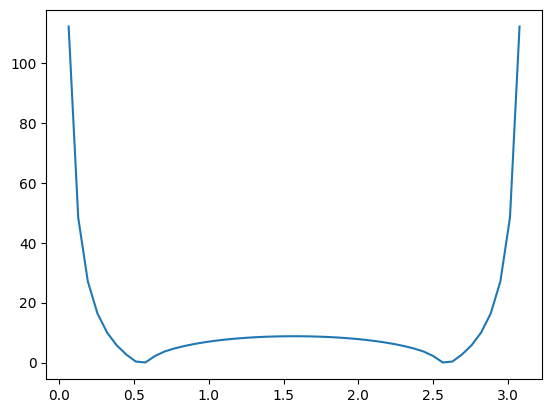

In [ ]:
#@title compute and plot:   **a) Aφ(r = 1.1, θ) vs. θ**

r = 1.1 
θ = np.linspace(0, np.pi)            #tomo solo estos valores para evitar problemas con las raices negativas

a= A(r, θ)

plt.plot(θ[1:-1] ,a[1:-1]);    #se excluyen los valores que producen la division por cero   

<ipython-input-3-33e9027a0313>:30: RuntimeWarning: divide by zero encountered in true_divide
  t3 = ( ( 2 - k_2(r, theta) ) * K(r, theta) - 2 * E(r, theta) ) / k_2(r, theta)


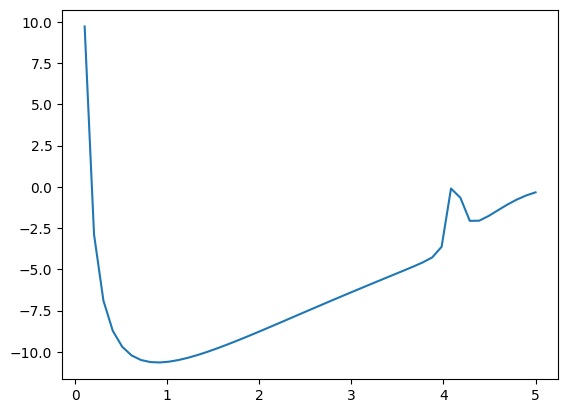

In [ ]:
#@title **b) Aφ(r, θ = π∕3) vs. r**

r = np.linspace(0, 5)
θ = np.pi/3           #tomo solo estos valores para evitar problemas con las raices negativas

a= A(r, θ)

plt.plot(r, a);

resolverlo hasta el 6 punto


7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large